 #  Heart Disease Prediction Project

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# Import  Dataset

In [2]:
#dataset link
#https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci


In [5]:
# loading the CSV data to a Pandas DataFrame
data=pd.read_csv('HeartDiseaseTrain-Test.csv')

In [6]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [7]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [8]:
data.tail()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,No,1.4,Flat,One,Reversable Defect,0


In [9]:
# information about data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

# Label Encoding

In [10]:
# find object values
object_columns = data.select_dtypes(include=['object']).columns.tolist()
object_columns

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia']

In [11]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in object_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the updated DataFrame
data.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0


In [12]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,2.171707,131.611707,246.00000,0.850732,1.485854,149.114146,0.336585,1.071512,0.614634,3.002927,1.331707,0.513171
std,9.072290,0.460373,0.959013,17.516718,51.59251,0.356527,0.528527,23.005724,0.472772,1.175053,0.617755,1.293384,1.444014,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.00000,1.000000,1.000000,132.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,240.00000,1.000000,2.000000,152.000000,0.000000,0.800000,1.000000,4.000000,0.000000,1.000000
75%,61.000000,1.000000,3.000000,140.000000,275.00000,1.000000,2.000000,166.000000,1.000000,1.800000,1.000000,4.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Taking care of Missing Values

In [13]:
data.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [14]:
# Not any missing values present

# Find Duplicate Values

In [15]:
data.duplicated().any()

True

In [16]:
# remove duplicate values
data=data.drop_duplicates()

In [17]:
data.duplicated().any()

False

# Data Visualization

In [18]:
data['target'].unique()

array([0, 1])

<ipython-input-19-47586e64bb94>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='Set1')


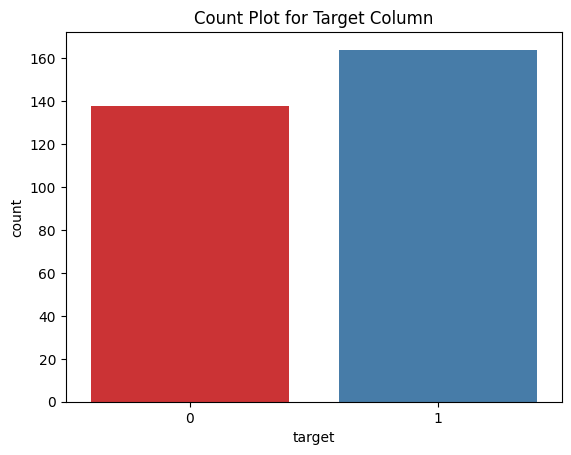

In [19]:
sns.countplot(x='target', data=data, palette='Set1')
plt.title('Count Plot for Target Column')
plt.show()

<Axes: >

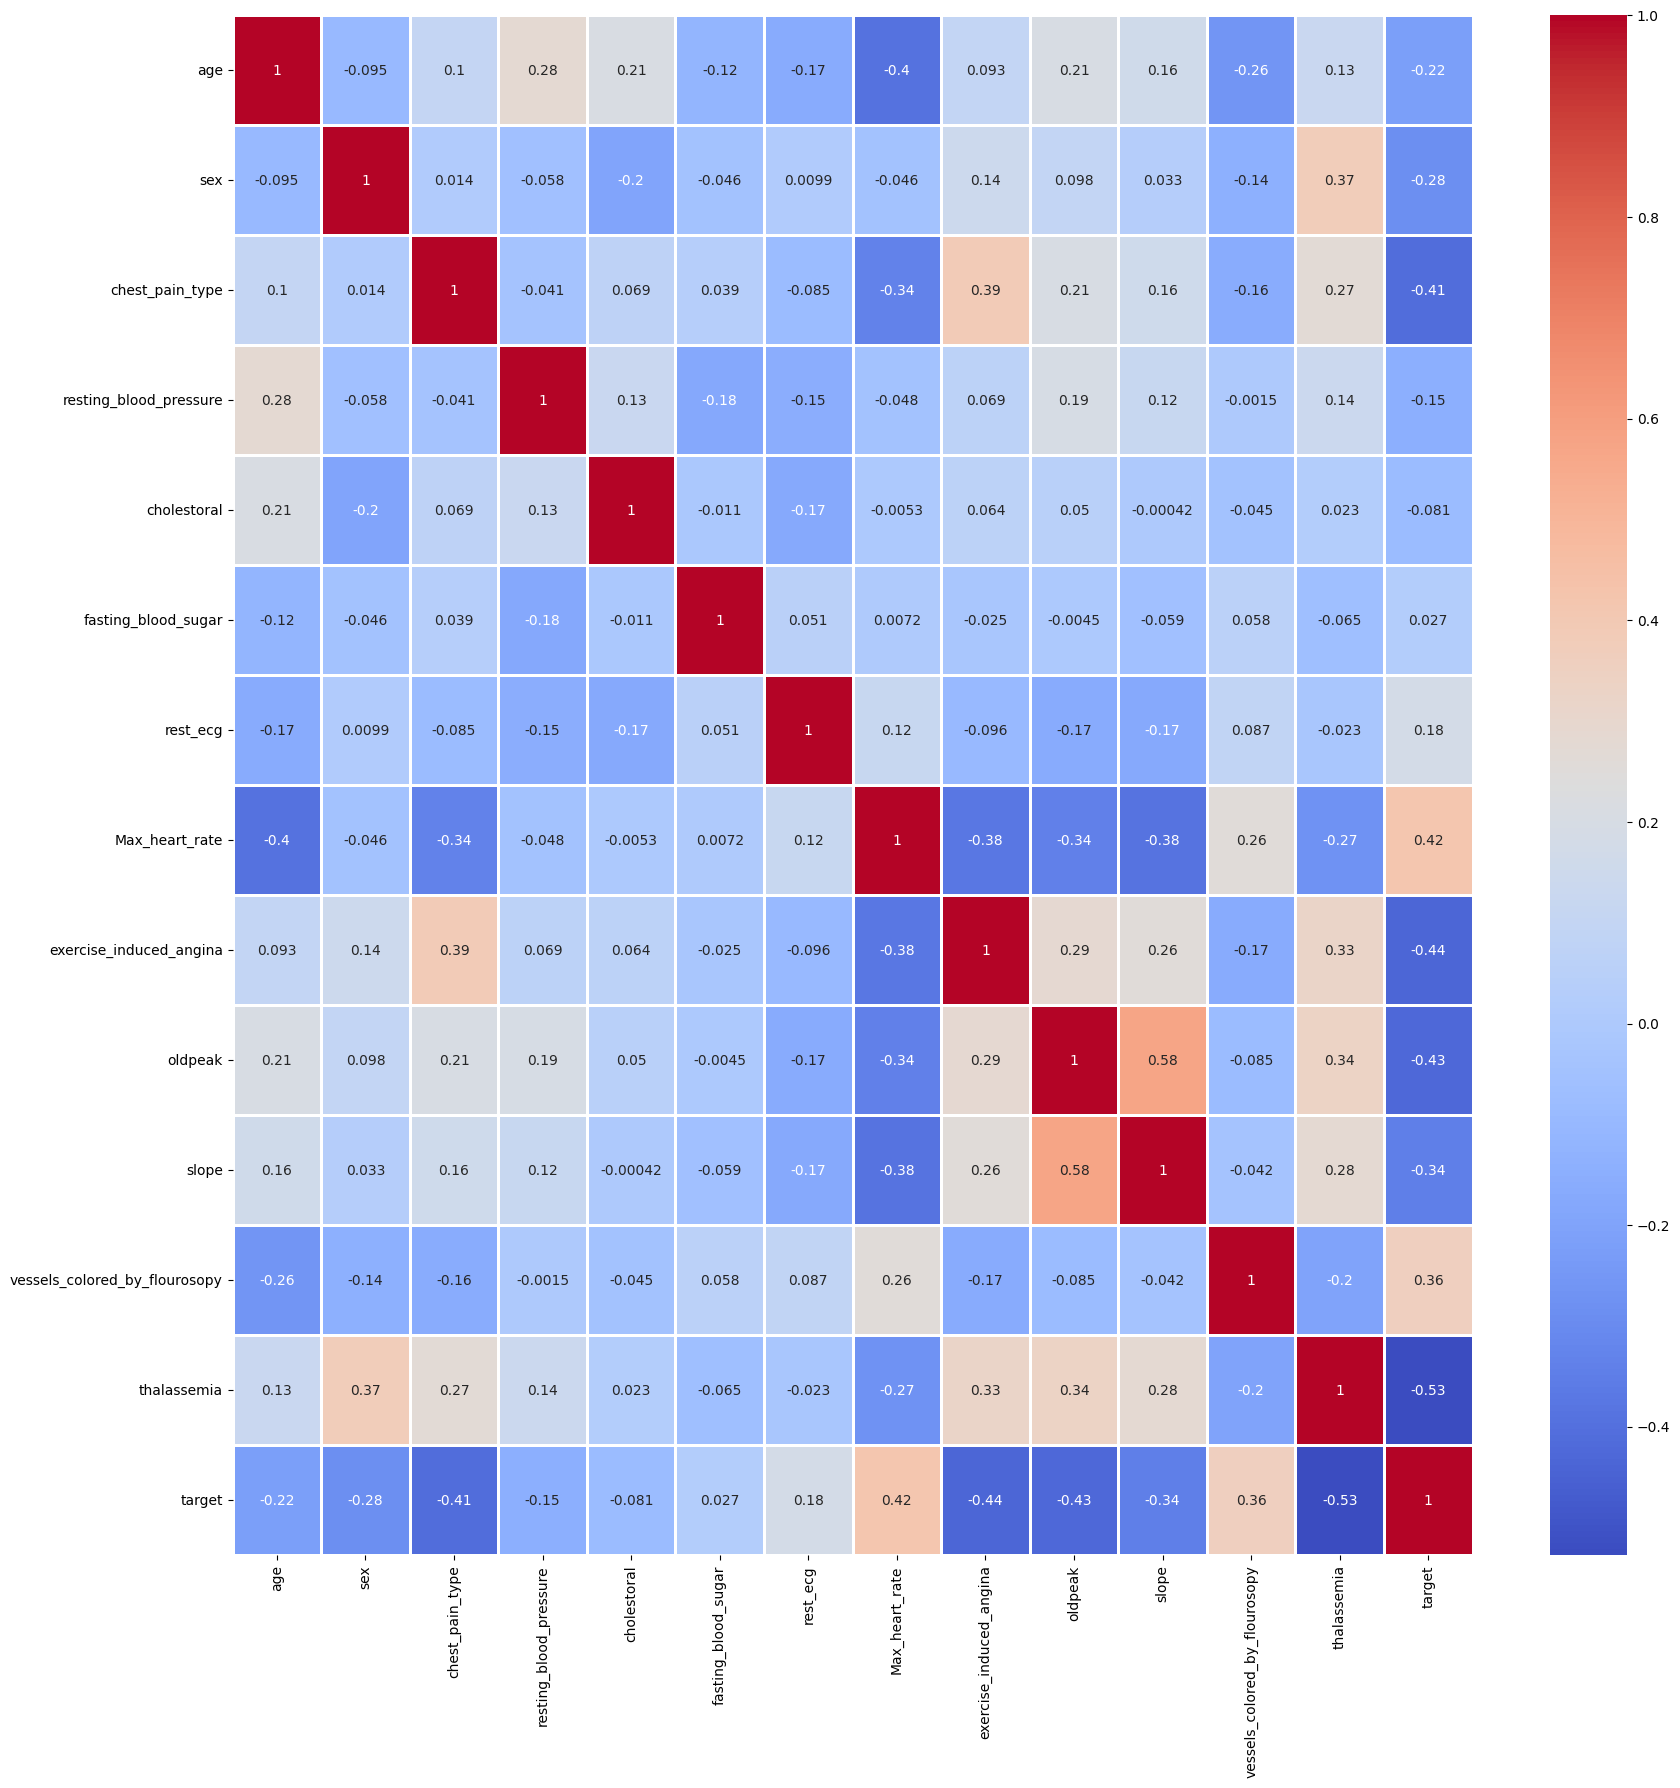

In [20]:
# Heatmap of Correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, cmap ='coolwarm', linewidths=2)

# Data Processing

# Data Encoding & Feature Scaling


In [21]:
categorical_features =[]
numerical_features = []
for column in data.columns:
    if data[column].nunique() <=10:
        categorical_features.append(column)
    else:
        numerical_features.append(column)


In [22]:
categorical_features

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia',
 'target']

In [23]:
numerical_features

['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']

In [24]:
# remove target
categorical_features = categorical_features[0:-1]
categorical_features

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'slope',
 'vessels_colored_by_flourosopy',
 'thalassemia']

In [25]:
data=pd.get_dummies(data,columns=categorical_features,drop_first=True)

In [26]:
st=StandardScaler()
data[numerical_features]=st.fit_transform(data[numerical_features])

In [27]:
data

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,...,exercise_induced_angina_1,slope_1,slope_2,vessels_colored_by_flourosopy_1,vessels_colored_by_flourosopy_2,vessels_colored_by_flourosopy_3,vessels_colored_by_flourosopy_4,thalassemia_1,thalassemia_2,thalassemia_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,-0.661712,-0.687083,-1.511859,0.394086,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
733,-1.153610,-1.346085,-2.041893,1.112172,-0.382092,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
739,-0.267966,-0.205463,0.164513,0.499898,-0.899544,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
843,0.506972,1.619532,0.512893,-1.074521,-0.899544,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Splitting the Dataset into Training and Testing

In [28]:
data.head()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,...,exercise_induced_angina_1,slope_1,slope_2,vessels_colored_by_flourosopy_1,vessels_colored_by_flourosopy_2,vessels_colored_by_flourosopy_3,vessels_colored_by_flourosopy_4,thalassemia_1,thalassemia_2,thalassemia_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [29]:
X=data.drop(columns='target', axis=1)

In [30]:
X.head()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_1,...,exercise_induced_angina_1,slope_1,slope_2,vessels_colored_by_flourosopy_1,vessels_colored_by_flourosopy_2,vessels_colored_by_flourosopy_3,vessels_colored_by_flourosopy_4,thalassemia_1,thalassemia_2,thalassemia_3
0,-0.267966,-0.376556,-0.667728,0.806035,-0.037124,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,-0.157260,0.478910,-0.841918,0.237495,1.773958,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
2,1.724733,0.764066,-1.403197,-1.074521,1.342748,1,0,0,1,1,...,1,0,1,0,0,0,1,0,0,1
3,0.728383,0.935159,-0.841918,0.499898,-0.899544,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
4,0.839089,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [31]:
y=data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [32]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [33]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 129 to 279
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              241 non-null    float64
 1   resting_blood_pressure           241 non-null    float64
 2   cholestoral                      241 non-null    float64
 3   Max_heart_rate                   241 non-null    float64
 4   oldpeak                          241 non-null    float64
 5   sex_1                            241 non-null    uint8  
 6   chest_pain_type_1                241 non-null    uint8  
 7   chest_pain_type_2                241 non-null    uint8  
 8   chest_pain_type_3                241 non-null    uint8  
 9   fasting_blood_sugar_1            241 non-null    uint8  
 10  rest_ecg_1                       241 non-null    uint8  
 11  rest_ecg_2                       241 non-null    uint8  
 12  exercise_induced_ang

In [34]:
# convert bool value into 0 and 1

bool_columns = data.select_dtypes(include=['bool']).columns.tolist()


x_test[bool_columns] = x_test[bool_columns].astype(int)
x_train[bool_columns] = x_train[bool_columns].astype(int)



In [35]:
x_test

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,sex_1,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,fasting_blood_sugar_1,...,exercise_induced_angina_1,slope_1,slope_2,vessels_colored_by_flourosopy_1,vessels_colored_by_flourosopy_2,vessels_colored_by_flourosopy_3,vessels_colored_by_flourosopy_4,thalassemia_1,thalassemia_2,thalassemia_3
252,0.064151,0.022661,2.061248,-0.768384,0.135360,1,0,0,1,1,...,1,1,0,1,0,0,0,0,0,1
191,0.174856,-0.091401,-0.493538,0.587366,-0.899544,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
228,-0.267966,-0.205463,-0.803209,1.505777,-0.899544,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
334,0.617678,-0.091401,-0.783855,-0.768384,1.170264,1,0,0,1,1,...,1,1,0,0,0,1,0,0,0,1
256,-2.149959,0.364848,-1.229007,1.418309,0.307844,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,-0.267966,-0.775774,-1.170944,1.768180,-0.899544,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
39,0.285561,-0.205463,-0.338703,0.018826,-0.554576,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
23,0.949794,0.193755,0.106449,0.980971,-0.899544,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
353,0.285561,-1.232023,-0.880627,-1.030787,0.394086,1,0,0,1,1,...,1,1,0,0,0,0,1,0,1,0


# Model Building

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report



# SVC

In [37]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)


SVC()

In [38]:
# Accuracy score

y_pred_scv = svc_classifier.predict(x_test)
accuracy_score(y_test, y_pred_scv)

0.8360655737704918

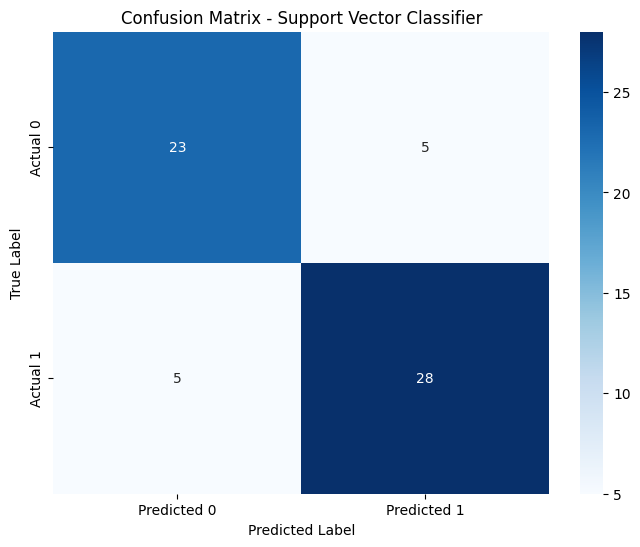

In [39]:
# Confusion metrix

conf_matrix_scv = confusion_matrix(y_test, y_pred_scv)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_scv, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.show()

In [40]:
# Acuracy report

report_scv = classification_report(y_test, y_pred_scv)

# Display the classification report
print("Classification Report - Support Vector Classifier:")
print(report_scv)

Classification Report - Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



# ANN

In [41]:
import tensorflow as tf

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [43]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [44]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, batch_size = 32, epochs = 75)

Epoch 1/75
8/8 [==============================] - 1s 3ms/step - loss: 0.8352 - accuracy: 0.4855
Epoch 2/75
8/8 [==============================] - 0s 3ms/step - loss: 0.7920 - accuracy: 0.5187
Epoch 3/75
8/8 [==============================] - 0s 3ms/step - loss: 0.7587 - accuracy: 0.5311
Epoch 4/75
8/8 [==============================] - 0s 2ms/step - loss: 0.7262 - accuracy: 0.5560
Epoch 5/75
8/8 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.5892
Epoch 6/75
8/8 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.6141
Epoch 7/75
8/8 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.6473
Epoch 8/75
8/8 [==============================] - 0s 2ms/step - loss: 0.6357 - accuracy: 0.6763
Epoch 9/75
8/8 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7095
Epoch 10/75
8/8 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.7137
Epoch 11/75
8/8 [======================

In [45]:
x_train_prediction=ann.predict(x_train)
x_train_prediction

8/8 [==============================] - 0s 2ms/step


array([[0.8114248 ],
       [0.02650588],
       [0.724597  ],
       [0.9819466 ],
       [0.00641024],
       [0.21806452],
       [0.99468267],
       [0.9063519 ],
       [0.9185137 ],
       [0.0138805 ],
       [0.8940196 ],
       [0.06165942],
       [0.9212314 ],
       [0.9820589 ],
       [0.924208  ],
       [0.9152357 ],
       [0.9826477 ],
       [0.6258654 ],
       [0.990507  ],
       [0.9355144 ],
       [0.01258887],
       [0.96383935],
       [0.40469882],
       [0.9934985 ],
       [0.98630464],
       [0.9372062 ],
       [0.28693476],
       [0.93391395],
       [0.28542256],
       [0.01432729],
       [0.99786896],
       [0.24688077],
       [0.982015  ],
       [0.9374223 ],
       [0.0191051 ],
       [0.99639654],
       [0.06066815],
       [0.99885577],
       [0.08878495],
       [0.02011722],
       [0.15638141],
       [0.96320623],
       [0.01080681],
       [0.6959519 ],
       [0.97785795],
       [0.97318065],
       [0.22413844],
       [0.998

In [46]:
threshold=0.5
# Convert to NumPy arrays
y_pred_np = (x_train_prediction > threshold).astype(int).reshape(-1, 1)

In [47]:
training_data_accuracy=accuracy_score(y_pred_np,y_train)

In [48]:
training_data_accuracy

0.8838174273858921

In [49]:
y_testing_pred=ann.predict(x_test)

2/2 [==============================] - 0s 5ms/step


In [50]:
threshold=0.5
# Convert to NumPy arrays
y_test_pred = (y_testing_pred > threshold).astype(int).reshape(-1, 1)

In [51]:
testing_data_accuracy=accuracy_score(y_test_pred, y_test)

In [52]:
testing_data_accuracy

0.9016393442622951

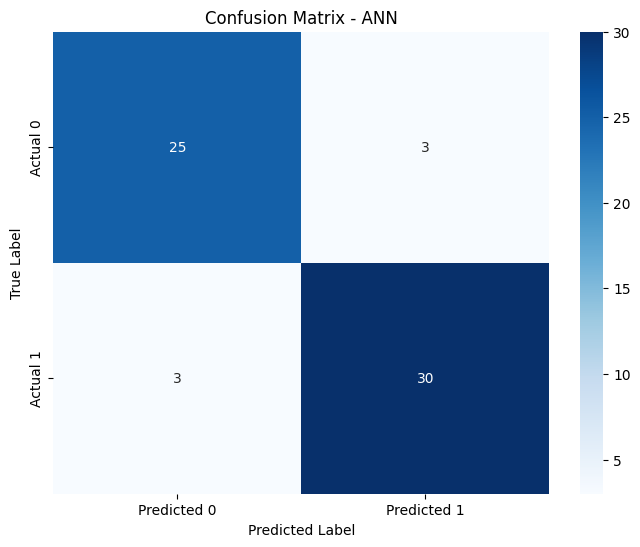

In [53]:
# Confusion metrix

conf_matrix_ann = confusion_matrix(y_test_pred,y_test)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - ANN')
plt.show()

In [54]:
# Acuracy report

report_ann = classification_report(y_test_pred,y_test)

# Display the classification report
print("Classification Report Artificial Neural Network:")
print(report_ann)

Classification Report Artificial Neural Network:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.91      0.91      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf=RandomForestClassifier()

In [57]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred5=rf.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

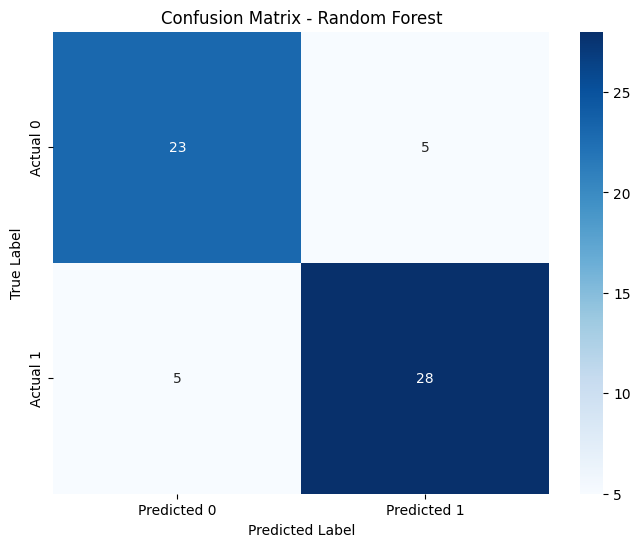

In [60]:
# Confusion metrix

conf_matrix_rf = confusion_matrix(y_test, y_pred5)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [61]:
# Acuracy report

report_rf= classification_report(y_test, y_pred5)

# Display the classification report
print("Classification Report - Random Forest:")
print(report_rf)

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



# XGBOOST

In [62]:
import xgboost as xgb

In [63]:
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

In [64]:
y_pred_xgb

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [65]:
accuracy_score(y_test,y_pred_xgb)

0.8032786885245902

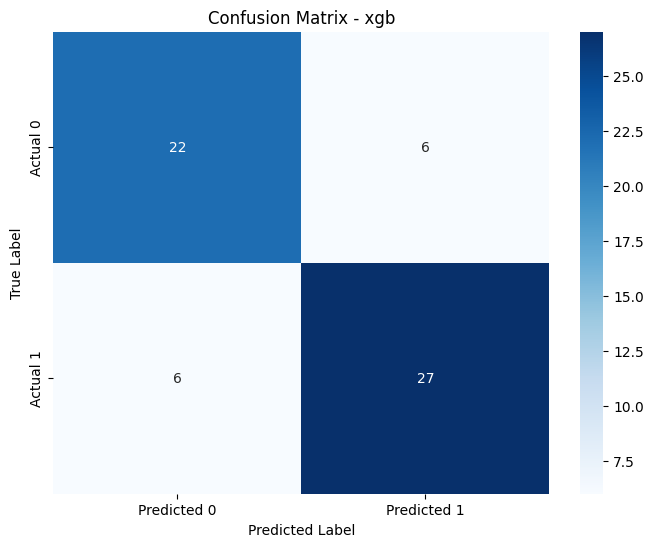

In [66]:
# Confusion metrix

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - xgb')
plt.show()

In [67]:
# Acuracy report

report_xgb = classification_report(y_test, y_pred_xgb)

# Display the classification report
print("Classification Report - Xgb:")
print(report_xgb)

Classification Report - Xgb:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



# DECISION TREE

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt=DecisionTreeClassifier()

In [70]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred4=dt.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred4)

0.6885245901639344

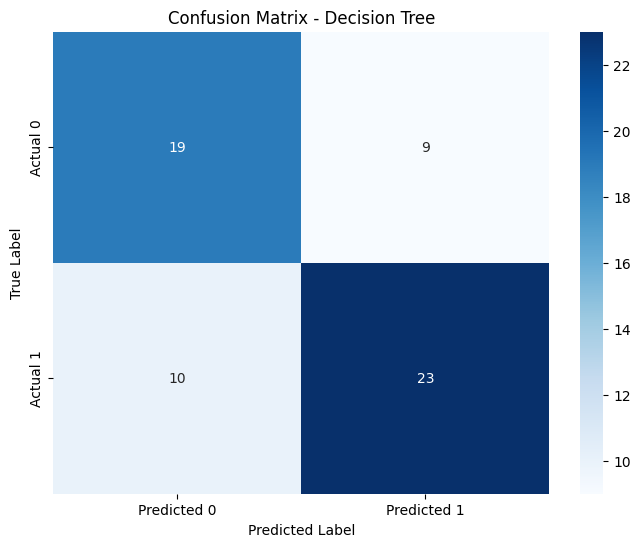

In [73]:
# Confusion metrix

conf_matrix_dt = confusion_matrix(y_test,y_pred4)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [74]:
# Acuracy report

report_dt = classification_report(y_test, y_pred4)

# Display the classification report
print("Classification Report - Decision Tree:")
print(report_dt)

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67        28
           1       0.72      0.70      0.71        33

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



# ADA BOOST

In [75]:
from sklearn.ensemble import AdaBoostClassifier

In [76]:
ada = AdaBoostClassifier()

In [77]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [78]:
y_pred_ada = ada.predict(x_test)

In [79]:
y_pred_ada

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [80]:
accuracy_score(y_test, y_pred_ada)

0.8032786885245902

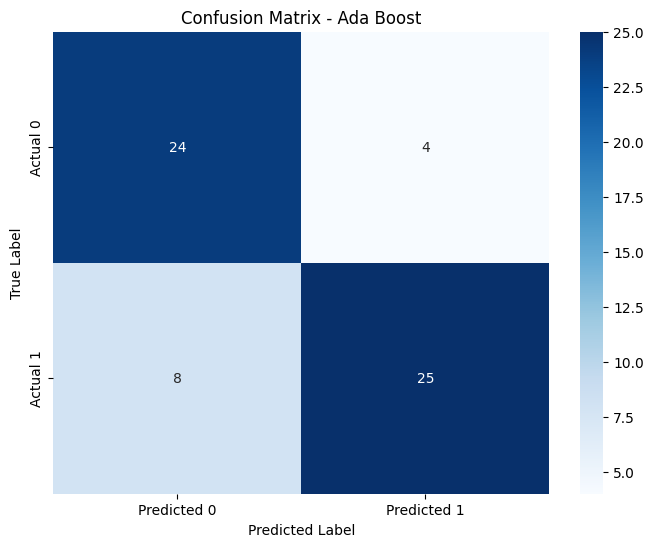

In [81]:
# Confusion metrix

conf_matrix_adb = confusion_matrix(y_test, y_pred_ada)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Ada Boost')
plt.show()

In [82]:
# Acuracy report

report_adb = classification_report(y_test, y_pred_ada)

# Display the classification report
print("Classification Report - Ada Boost:")
print(report_adb)

Classification Report - Ada Boost:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        28
           1       0.86      0.76      0.81        33

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



# EXTRA TREE CLASSIFIER

In [83]:
from sklearn.ensemble import ExtraTreesClassifier

In [84]:
et_100 = ExtraTreesClassifier(n_estimators= 100)

In [85]:
et_100.fit(x_train,y_train)

ExtraTreesClassifier()

In [86]:
y_pred_et_100 = et_100.predict(x_test)

In [87]:
y_pred_et_100

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [88]:
accuracy_score(y_test,y_pred_et_100)

0.8688524590163934

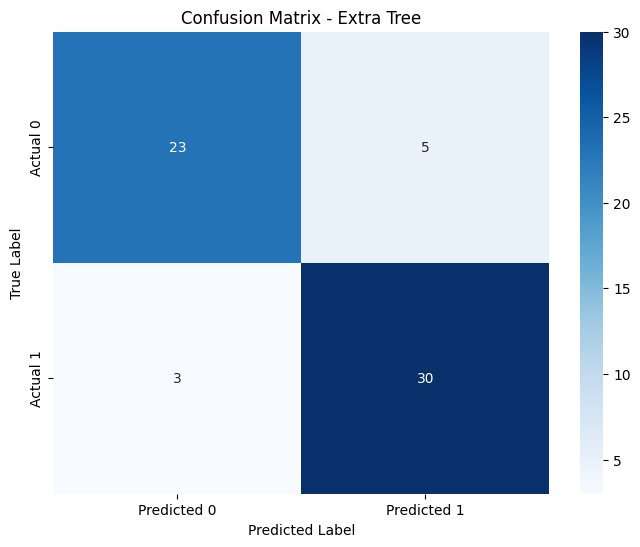

In [89]:
# Confusion metrix

conf_matrix_et= confusion_matrix(y_test, y_pred_et_100)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Extra Tree')
plt.show()

In [90]:
# Acuracy report

report_et = classification_report(y_test, y_pred_et_100 )

# Display the classification report
print("Classification Report - Extra Tree:")
print(report_et)

Classification Report - Extra Tree:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# GRADIENT BOOSTING CLASSIFIER

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')

In [93]:
gbm.fit(x_train,y_train)

GradientBoostingClassifier(max_features='sqrt')

In [94]:
y_pred_gbm = gbm.predict(x_test)

In [95]:
y_pred_gbm

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [96]:
accuracy_score(y_test, y_pred_gbm)

0.8524590163934426

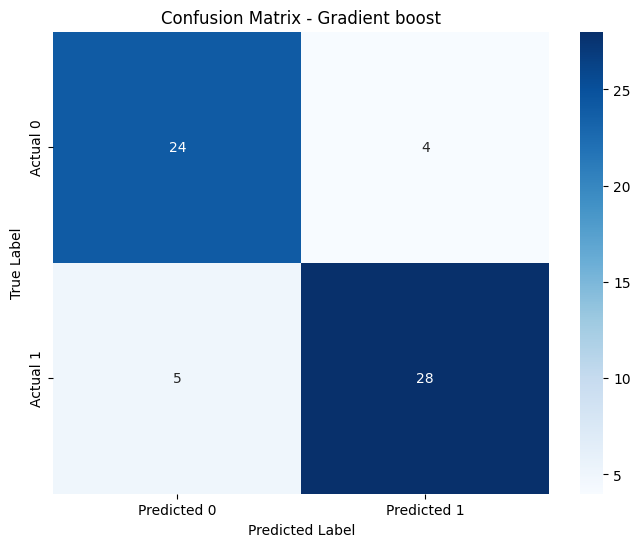

In [97]:
# Confusion metrix

conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient boost')
plt.show()

In [98]:
# Acuracy report

report_gbm = classification_report(y_test, y_pred_gbm)

# Display the classification report
print("Classification Report - Gradient descent Boost:")
print(report_gbm)

Classification Report - Gradient descent Boost:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

